# K-Means Clustering

In this notebook, we will implement the **K-Means** algorithm with `sklearn`.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# K-Means Clustering
from sklearn.cluster import KMeans

# Loading the digit dataset
from sklearn.datasets import load_digits

# Selecting 'k' through silhouette_score
from sklearn.metrics import silhouette_score

# Normalization through Min-Max scaler
from sklearn.preprocessing import MinMaxScaler

# For creating pipelines
from sklearn.pipeline import Pipeline

# Clustering of digits

We will use the digit dataset for clustering, which is loaded throught the `load_digit` API.
- It loads $8 \times 8$ digit images with approximately $180$ samples per class.
- From $10$ classes it has a total of $1797$ images.
- Each pixel has a values between $0$ and $16$.

In [2]:
digit = load_digits()

In [12]:
X, y = digit.data, digit.target

Let's quickly check the `KMeans` class as implemented in `sklearn.cluster` module.

In [3]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

Some important parameters are as follows:
- `init`: `{'k-means++', 'random'}`
    - `k-means++`: selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    - `random`: choose `n_clusters` observations (rows) at random from data for the initial centroids.
- `n_init`: int, default=10
    - Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of `n_init` consecutive runs in terms of inertia.
- `max_iter`: int, default=300
    - Maximum number of iterations of the k-means algorithm for a single run.
- `random_state`: Determines random number generation for centroid initialization.

Since, `KMeans` algorithm is suceptible to local minima, we perform multiple `Kmeans` fits and select the ones with the lowest value of sum squared error.

The total no. of times, we would like to run `KMeans` algorithm is specified through the `n_init` parameter.

`max_iter` specified the total no. of iterations to perform before declaring the convergence.

Let's define parameters of KMeans clustering algorithm in a dictionary object.

In [5]:
kmeans_kwargs = {
    'init':'random',
    'n_init': 50,
    'max_iter': 500,
    'random_state': 0,
}

Let's define a pipeline with $2$ stages:
- preprocessing for feature scaling with `MinMaxScaler`
- clustering with `KMeans` clustering algorithm.

In [6]:
km_pipe = Pipeline([
    ('preprocess', MinMaxScaler()),
    ('classifier', KMeans(n_clusters=10, **kmeans_kwargs))
])

In [8]:
km_pipe.fit(X)

Pipeline(steps=[('preprocess', MinMaxScaler()),
                ('classifier',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

The cluster centroids can be accessed via `cluster_centers_` member variable of the `KMeans` class.

In [9]:
cluster_centers = km_pipe[-1].cluster_centers_

Let's display the cluster centeroids:

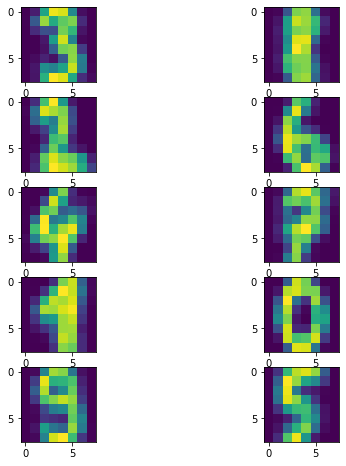

In [10]:
# displaying centroids
fig, ax = plt.subplots(5,2, figsize=(8,8))
for i,j in zip(ax.flat, cluster_centers.reshape(10,8,8)):
    i.imshow(j)

In this case, the no. of clusters were known. Hence, we set `k=10` and got the clusters.

For deciding the optimal no. of clusters through elbow and silhoutte, we will pretend not to know the no, of clusters in the data and we will try to discover the optimal no. of clusters through these $2$ methods one by one below.

# Elbow Method

Here, we keep track of the sum-squared-error (SSE) in a list for each value of `k`. 

In [15]:
# Identig=fying the correct no. of clusters
sse_digit = []
X_scaled = MinMaxScaler().fit_transform(X)

for k in range(1,12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse_digit.append(kmeans.inertia_)

Note that SSE for a given clustering output is obtained throught the `inertia_` member variable.

Let's visualize the SSE via plots.

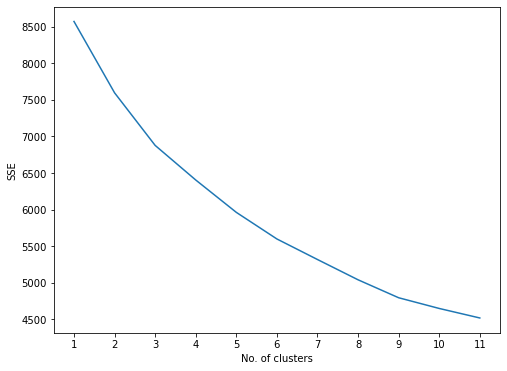

In [19]:
plt.figure(figsize=(8,6))
plt.plot(range(1,12), sse_digit)
plt.xticks(range(1,12))
plt.xlabel("No. of clusters")
plt.ylabel("SSE")
plt.show()

As we can see, there is a slight elbow at `k=9`, which could point to the fact that a few digits may have been merged into one cluster.

# Silhoutte

In [18]:
sil_coef_digit = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    sil_coef_digit.append(score)

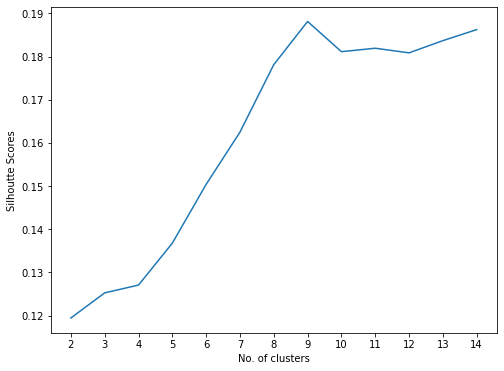

In [20]:
plt.figure(figsize=(8,6))
plt.plot(range(2,15), sil_coef_digit)
plt.xticks(range(2,15))
plt.xlabel("No. of clusters")
plt.ylabel("Silhoutte Scores")
plt.show()

The graph clearly points to the fact that `k=9` is the optimum no. of clusters, which could be because of the confusion between digits $1$ and $7$, which have a striking similarity, which causes in a mix up between those $2$ digits.

In [ ]:
%%time